# Avance 1 Equipo 20 – Análisis Exploratorio de Datos (EDA)

## Proyecto: Detección y Clasificación de Anillos en Galaxias
**Materia:** Proyecto Integrador
**Programa:** Maestría en Inteligencia Artificial Aplicada  
**Institución:** Tecnológico de Monterrey / UNAM  

**Equipo:** Equipo 20  
**Integrantes:**  
- Francisco Javier Rodríguez Echevarría - A01795970
- Gabriel Sareñana Labra - A01795507
- Yamil Abraham Nechar Reyes - A01795726

**Fecha:** 01/02/26

---

## Objetivo del notebook

El objetivo de este notebook es realizar un **Análisis Exploratorio de Datos (EDA)** del conjunto de datos proporcionado para el proyecto de detección y clasificación de anillos en galaxias.  

Este análisis tiene como finalidad:

- Comprender la **estructura y calidad de los datos** tabulares y de imagen.
- Identificar **valores faltantes, atípicos y posibles inconsistencias**.
- Analizar la **distribución de las variables** y la **cardinalidad de las etiquetas**.
- Detectar **tendencias, relaciones y posibles problemas** que puedan afectar el desempeño de modelos de aprendizaje automático.
- Justificar las **decisiones de preprocesamiento** necesarias para mejorar la generalización de los modelos.

Este avance se enmarca dentro de la fase **Data Understanding** de la metodología **CRISP-ML(Q)**.

---

## Fuente de los datos

El conjunto de datos utilizado en este proyecto proviene del trabajo de **Fernández et al. (2021)** y fue proporcionado por investigadores de la UNAM.  

Los datos consisten en:
- Una **tabla de galaxias** (en formato CSV/FITS) que contiene información astronómica como coordenadas celestes y etiquetas de tipo de anillo.
- **Imágenes de galaxias** descargadas desde el sitio **Legacy Survey (DESI)** a partir de las coordenadas de cada objeto.

Las imágenes corresponden a recortes centrados en cada galaxia, obtenidos en las bandas **g, r y z (grz)**.

---

## Alcance de este avance

En este notebook **no se entrena ningún modelo de aprendizaje automático**.  
El enfoque está exclusivamente en el análisis exploratorio y el preprocesamiento inicial de los datos.

Las tareas de modelado y evaluación se abordarán en avances posteriores.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Contexto del conjunto de datos y definición de etiquetas

El conjunto de datos utilizado en este proyecto corresponde a una muestra de galaxias analizadas en el trabajo la UNAM, en el cual se identifican y clasifican diferentes tipos de estructuras de anillos galácticos a partir de observaciones astronómicas.

La información proporcionada consiste en una **tabla de datos** que contiene, entre otras variables, las coordenadas celestes de cada galaxia y una etiqueta que describe el tipo de anillo observado. A partir de estas coordenadas (ascensión recta y declinación), se obtienen imágenes de las galaxias desde el **Legacy Survey (DESI)**, las cuales constituyen el insumo principal para los análisis de visión computacional.

---

## Variable `anillos`

La columna **`anillos`** representa una variable categórica codificada que describe el tipo de estructura observada en cada galaxia. Los valores posibles y su interpretación física son los siguientes:

- **2 – Anillo nuclear:**  
  Estructura circular o elíptica pequeña ubicada en la región central de la galaxia.

- **4 – Anillo interno:**  
  Estructura circular o elíptica cerrada que rodea la barra o el bulbo central de la galaxia.

- **8 – Anillo externo:**  
  Estructura circular o elíptica cerrada ubicada en las regiones externas de la galaxia, usualmente con un tamaño aproximadamente doble al de la barra (si existe).

- **12 – Anillo interno + externo:**  
  Galaxias que presentan simultáneamente un anillo interno y un anillo externo.

- **16 – Anillos parciales o pseudoanillos:**  
  Estructuras que no forman un anillo completamente cerrado y suelen estar asociadas a los brazos espirales.

Esta codificación implica que la variable `anillos` **no es binaria**, sino que contiene múltiples categorías con distinto significado físico y complejidad morfológica.

---

## Definición de las tareas del proyecto

De acuerdo con la descripción proporcionada por los investigadores, el proyecto contempla las siguientes tareas, ordenadas por complejidad:

1. **Clasificación binaria:**  
   Determinar si una galaxia presenta o no un **anillo interno y/o externo**.

2. **Clasificación multiclase:**  
   Para las galaxias con anillo, distinguir entre **anillos internos y externos**.

3. **Estimación de la distancia del anillo al centro de la galaxia:**  
   Tarea de mayor complejidad que involucra análisis geométrico sobre las imágenes.

En este avance, el análisis exploratorio se enfoca principalmente en **la primera tarea**, ya que constituye el problema base del proyecto y permite evaluar la calidad y distribución de los datos.

---

## Redefinición de etiquetas para la Tarea 1

Con el objetivo de abordar la clasificación binaria (con anillo vs sin anillo), se propone una **redefinición de la variable objetivo**:

- **Galaxias sin anillo:**  
  Aquellas que no presentan anillos internos ni externos.

- **Galaxias con anillo:**  
  Aquellas cuya etiqueta `anillos` indica la presencia de:
  - Anillo interno (4)
  - Anillo externo (8)
  - Anillo interno + externo (12)

Los **anillos nucleares (2)** y los **anillos parciales (16)** se consideran estructuras morfológicas más complejas de detectar y podrán ser:
- Excluidos del primer modelo, o
- Analizados de forma exploratoria para evaluar su impacto en la generalización del modelo.

Esta redefinición permite reducir la complejidad inicial del problema y mejorar la capacidad de generalización del modelo, alineándose con los objetivos del proyecto y con la fase de **Data Understanding** de la metodología **CRISP-ML(Q)**.


#2. Setup del entorno y carga del conjunto de datos

Este notebook está diseñado para ejecutarse en un entorno de cómputo en la nube (Google Cloud / Google Colab).  
Debido al tamaño del conjunto de datos y a las buenas prácticas de versionamiento, **los archivos de datos no se almacenan directamente en el repositorio de GitHub**.

### Almacenamiento del dataset

El archivo `dataset.csv` debe cargarse previamente en una ubicación accesible desde el entorno de ejecución, por ejemplo:

- **Google Drive**, montado desde Google Colab
- Un bucket de almacenamiento en la nube (opcional)

### Uso de Google Drive compartido

Para facilitar el trabajo colaborativo, el dataset y los notebooks pueden almacenarse en un **Google Drive compartido del equipo**.  
Al ejecutar el notebook en Google Colab, cada integrante montará su propio Drive, pero el Drive compartido será accesible siempre que se cuenten con los permisos correspondientes.

En este proyecto se asume que:
- El dataset se encuentra almacenado en Google Drive
- El notebook accede al archivo a través de una ruta definida por el usuario

Esta estrategia permite:
- Mantener el repositorio ligero
- Facilitar la colaboración
- Garantizar la reproducibilidad del análisis


In [2]:
# =========================================
# Notebook: EDA
# Proyecto: Detección de anillos en galaxias
# =========================================

# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Configuración general
# =========================
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 10

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

# =========================
# Montar Google Drive
# =========================
from google.colab import drive
drive.mount("/content/drive")

# Config / Load
BASE_PATH = "/content/drive/MyDrive/Capstone Project/Entregables/Proyecto/"

DATA_PATH = os.path.join(BASE_PATH, "Dataset")
OUTPUT_PATH = os.path.join(BASE_PATH, "Outputs")

os.makedirs(OUTPUT_PATH, exist_ok=True)

DATASET_PATH = os.path.join(DATA_PATH, "dataset.csv")

df = pd.read_csv(DATASET_PATH)

print("Dataset cargado")
print("Shape:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset cargado
Shape: (8528, 5)


objID         ra        dec         z  anillos
0  1237648721210769659  134.44717  -0.199973  0.028206      0.0
1  1237648705657307354  198.23356   0.941188  0.048037      0.0
2  1237648705120895059  199.29492   0.527571  0.024114      0.0
3  1237648720150724863  165.74061  -0.962095  0.033483      0.0
4  1237649919509594232   31.37202  13.251016  0.024694      0.0

#3. Estructura del conjunto de datos y descripción de variables

En esta sección se analiza la estructura general del conjunto de datos, incluyendo el número de observaciones, tipos de variables y estadísticas descriptivas básicas.  

El objetivo es comprender qué información contiene el dataset y verificar que los datos sean consistentes antes de realizar análisis más profundos.


## 3.1 Glosario de variables astronómicas (ra, dec, z)

Para interpretar correctamente el EDA y, en particular, los efectos del **redshift (`z`)** en la detección de anillos, es importante aclarar qué representa cada variable:

- **`ra` (Right Ascension / Ascensión recta, en grados)**  
  Coordenada celeste equivalente a la “longitud” sobre la esfera celeste. Se mide típicamente de **0° a 360°** (o 0h a 24h si se expresa en horas).  
  En este dataset se usa para **ubicar la galaxia en el cielo** y entender **qué regiones** fueron observadas (cobertura del survey).

- **`dec` (Declination / Declinación, en grados)**  
  Coordenada celeste equivalente a la “latitud” sobre la esfera celeste. Se mide de **−90° a +90°**.  
  También refleja la **huella de observación** (qué zonas del cielo están más muestreadas).

- **`z` (Redshift / corrimiento al rojo, adimensional)**  
  Es una medida del desplazamiento de las líneas espectrales hacia longitudes de onda más largas debido a la expansión del universo.  
  En primera aproximación: **a mayor `z`, más lejos está la galaxia** (y, por ende, menor tamaño angular y menor detalle visible).

### ¿Por qué `z` es crítico para anillos internos vs externos?
- **Resolución angular:** a mayor `z`, los anillos (sobre todo los **internos**) ocupan menos píxeles y se vuelven más difíciles de distinguir.  
- **Atenuación cosmológica (dimming):** el brillo superficial decrece aproximadamente con \((1+z)^4\), reduciendo contraste de estructuras tenues (por ejemplo, pseudoanillos o anillos externos difusos).  
- **Sesgo de selección:** es posible que el dataset contenga **más anillos internos** a `z` bajos (cercanos) y **menos anillos externos** a `z` altos por dificultad de detección.


In [3]:
# Vista general del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8528 entries, 0 to 8527
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   objID    8528 non-null   int64  
 1   ra       8528 non-null   float64
 2   dec      8528 non-null   float64
 3   z        8528 non-null   float64
 4   anillos  8528 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 333.3 KB


In [4]:
# =========================
# Estadísticas descriptivas
# =========================
df.describe(include="all")


objID           ra          dec            z      anillos
count  8.528000e+03  8528.000000  8528.000000  8528.000000  8528.000000
mean   1.237662e+18   183.268013    25.180086     0.035896     1.767589
std    5.887859e+12    59.249332    18.394527     0.015032     4.059707
min    1.237649e+18     0.008759   -11.082615     0.010068     0.000000
25%    1.237658e+18   153.145473    10.446179     0.024653     0.000000
50%    1.237662e+18   185.068475    23.905970     0.033006     0.000000
75%    1.237666e+18   219.528357    39.203309     0.044839     0.000000
max    1.237680e+18   359.276680    70.133229     0.098892    16.000000

In [5]:
# =========================
# Nombres de columnas
# =========================
df.columns



Index(['objID', 'ra', 'dec', 'z', 'anillos'], dtype='object')

#4. Calidad del conjunto de datos

Antes de realizar análisis más avanzados, es fundamental evaluar la calidad del conjunto de datos.  
En esta sección se analizan aspectos clave como la presencia de valores faltantes, duplicados y la consistencia de los rangos de las variables, con el fin de identificar posibles problemas que requieran preprocesamiento.


In [6]:
# =========================
# Valores faltantes
# =========================
missing_values = df.isnull().sum()
missing_values

# =========================
# Filas duplicadas
# =========================
duplicated_rows = df.duplicated().sum()
duplicated_rows

print("Valores faltantes:")
print(missing_values)
print("\nFilas duplicadas:", duplicated_rows)




Valores faltantes:
objID      0
ra         0
dec        0
z          0
anillos    0
dtype: int64

Filas duplicadas: 0


In [7]:
# =========================
# Revisión de rangos físicos plausibles
# =========================
ranges = {
    "ra": (0, 360),
    "dec": (-90, 90),
    "z": (0, None)
}

for col, (min_val, max_val) in ranges.items():
    col_min = df[col].min()
    col_max = df[col].max()
    print(f"{col}: min={col_min:.3f}, max={col_max:.3f}")


ra: min=0.009, max=359.277
dec: min=-11.083, max=70.133
z: min=0.010, max=0.099


In [8]:
#Validación de la columna 'anillos'
TARGET_COL = "anillos"

if TARGET_COL not in df.columns:
    raise KeyError(f"No existe la columna '{TARGET_COL}' en el dataset. Columnas disponibles: {list(df.columns)[:25]} ...")

print("Columna objetivo encontrada:", TARGET_COL)
print("Tipo de dato:", df[TARGET_COL].dtype)

# Conteo de nulos en target
print("Nulos en anillos:", df[TARGET_COL].isna().sum())

# Valores únicos en target
unique_vals = pd.Series(df[TARGET_COL].dropna().unique()).sort_values()
print("\nValores únicos en 'anillos' (sin NaN):")
print(unique_vals.to_list())

Columna objetivo encontrada: anillos
Tipo de dato: float64
Nulos en anillos: 0

Valores únicos en 'anillos' (sin NaN):
[0.0, 2.0, 4.0, 8.0, 12.0, 16.0]


#4.1 Filtrado de clases

In [9]:
# =========================================
# PREPROCESAMIENTO ROBUSTO: Filtrado y Conversión
# =========================================

# 1. Filtrar clases de interés
clases_interes = [0, 4, 8, 12]
df_filtrado = df[df['anillos'].isin(clases_interes)].copy()

# 2. CORRECCIÓN CLAVE: Convertir a entero para evitar errores de mapeo (0.0 -> 0)
df_filtrado['anillos'] = df_filtrado['anillos'].astype(int)

# 3. Definir mapeo
mapa_etiquetas = {
    0: 'Sin Anillo',
    4: 'Interno',
    8: 'Externo',
    12: 'Interno + Externo'
}

# 4. Aplicar mapeo y convertir a Categoría (importante para el orden en gráficas)
df_filtrado['tipo_anillo'] = df_filtrado['anillos'].map(mapa_etiquetas)

# Definimos el orden lógico para que las gráficas no salgan desordenadas
orden_clases = ['Sin Anillo', 'Interno', 'Externo', 'Interno + Externo']
df_filtrado['tipo_anillo'] = pd.Categorical(
    df_filtrado['tipo_anillo'],
    categories=orden_clases,
    ordered=True
)

# Verificación
print(f"Registros originales: {df.shape[0]}")
print(f"Registros filtrados: {df_filtrado.shape[0]}")
print("\nConteo de clases (debe no haber NaNs):")
print(df_filtrado['tipo_anillo'].value_counts(dropna=False))

Registros originales: 8528
Registros filtrados: 8075

Conteo de clases (debe no haber NaNs):
tipo_anillo
Sin Anillo           6660
Interno               857
Interno + Externo     372
Externo               186
Name: count, dtype: int64


## Actualización del Alcance y Filtrado de Clases

Basado en la retroalimentación recibida, el proyecto se enfocará en el análisis de galaxias con **anillos bien definidos** y su relación con el valor de **Redshift (z)**.

**Decisiones de Diseño:**
1. **Exclusión de clases complejas:** Se eliminarán del dataset los registros correspondientes a:
   - **Anillos Nucleares (2):** Estructuras muy pequeñas difíciles de resolver.
   - **Pseudoanillos (16):** Estructuras abiertas o parciales que introducen ruido.

2. **Clases de Interés (Conservadas):**
   - **0:** Sin Anillo
   - **4:** Anillo Interno
   - **8:** Anillo Externo
   - **12:** Anillo Interno + Externo

3. **Foco en Z:** Se utilizará el redshift como variable clave para entender si la distancia afecta la capacidad de etiquetado o detección de los anillos.


## Conclusiones sobre la calidad de los datos

A partir del análisis de calidad del conjunto de datos, se obtienen las siguientes observaciones:

- No se identificaron **valores faltantes** en ninguna de las variables del dataset (`objID`, `ra`, `dec`, `z` y `anillos`). Todas las 8,528 observaciones cuentan con información completa, lo que elimina la necesidad de aplicar estrategias de imputación en esta etapa.

- No se detectaron **filas duplicadas** dentro del conjunto de datos, ni a nivel de registros completos ni considerando el identificador `objID`, lo que indica que cada galaxia está representada de manera única en la tabla.

- Las variables astronómicas presentan **rangos físicamente plausibles**:
  - `ra` se encuentra en el intervalo aproximado **[0.009°, 359.277°]**, consistente con el rango esperado para la ascensión recta.
  - `dec` toma valores entre **[-11.083°, 70.133°]**, dentro del rango válido para la declinación.
  - `z` presenta valores entre **0.010 y 0.099**, correspondientes a galaxias relativamente cercanas, coherentes con el alcance del estudio.

- La variable `anillos` se encuentra codificada como numérica, pero representa una **variable categórica discreta**, lo cual será considerado explícitamente en los análisis posteriores y en la definición de la variable objetivo.

En conjunto, estos resultados indican que el dataset presenta **buena calidad y consistencia estructural**, permitiendo avanzar hacia el análisis exploratorio univariante y bivariado sin requerir correcciones inmediatas en esta fase.


#5. Análisis univariante

El análisis univariante permite estudiar la distribución de cada variable de forma individual, con el objetivo de identificar patrones, valores atípicos, sesgos y características relevantes del conjunto de datos.

En esta sección se analizan las variables numéricas (`ra`, `dec`, `z`) y la variable categórica `anillos`, utilizando estadísticas descriptivas y técnicas de visualización apropiadas para cada caso.


### 5.1 Variables numéricas: ra, dec y z

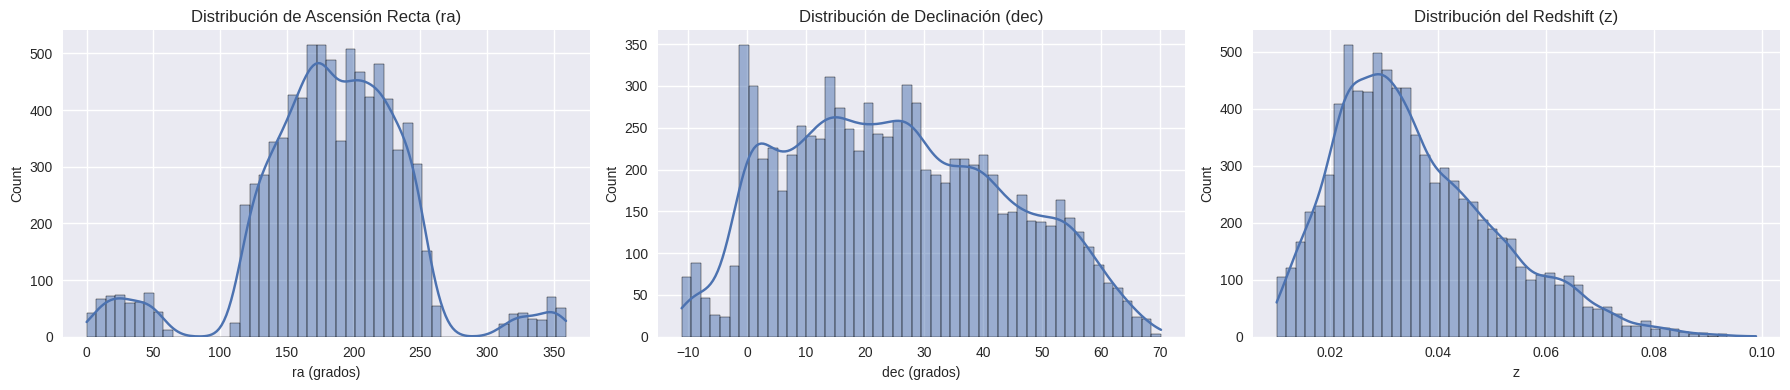

In [10]:
# =========================
# Histogramas de variables numéricas
# =========================
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(df["ra"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribución de Ascensión Recta (ra)")
axes[0].set_xlabel("ra (grados)")

sns.histplot(df["dec"], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribución de Declinación (dec)")
axes[1].set_xlabel("dec (grados)")

sns.histplot(df["z"], bins=50, kde=True, ax=axes[2])
axes[2].set_title("Distribución del Redshift (z)")
axes[2].set_xlabel("z")

plt.tight_layout()
plt.show()


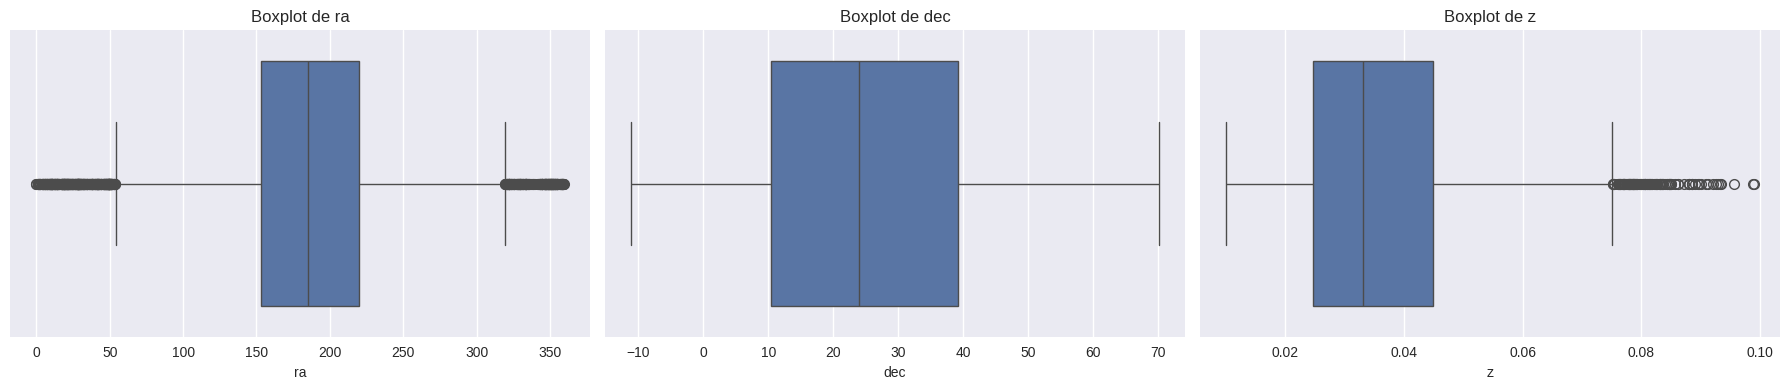

In [11]:
# =========================
# Boxplots para detectar valores atípicos
# =========================
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.boxplot(x=df["ra"], ax=axes[0])
axes[0].set_title("Boxplot de ra")

sns.boxplot(x=df["dec"], ax=axes[1])
axes[1].set_title("Boxplot de dec")

sns.boxplot(x=df["z"], ax=axes[2])
axes[2].set_title("Boxplot de z")

plt.tight_layout()
plt.show()


### 5.1.1 Cobertura en el cielo (ra vs dec)

Para evaluar si el dataset proviene de regiones específicas del cielo (sesgo de muestreo observacional), se grafica `ra` vs `dec`.  
Esto ayuda a interpretar concentraciones en `ra/dec` como **huella del survey**, no como un fenómeno físico de las galaxias.


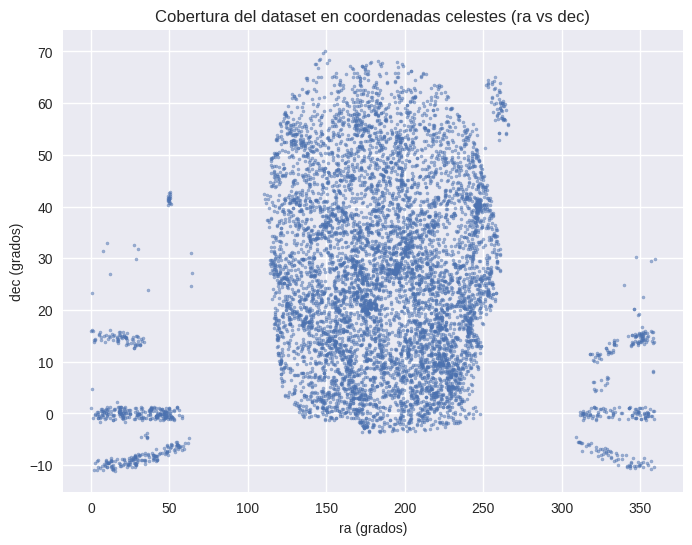

In [12]:
# =========================
# Cobertura del cielo: RA vs DEC
# =========================
plt.figure(figsize=(8, 6))
plt.scatter(df['ra'], df['dec'], s=5, alpha=0.5)
plt.title("Cobertura del dataset en coordenadas celestes (ra vs dec)")
plt.xlabel("ra (grados)")
plt.ylabel("dec (grados)")
plt.show()


### Interpretación de las variables numéricas (ra, dec, z)

- **`ra` (ascensión recta)** y **`dec` (declinación)** describen **posición en el cielo**, no propiedades físicas intrínsecas de la galaxia.  
  Por ello, concentraciones en ciertos rangos suelen interpretarse como **cobertura/huella del survey** (sesgo observacional), no como un patrón astrofísico.

- **`ra`** no es completamente uniforme: se aprecia una mayor densidad en un intervalo intermedio. Esto sugiere que el muestreo proviene de **regiones específicas** del cielo.

- **`dec`** también es asimétrica, con mayor concentración en valores positivos. Esto es consistente con **limitaciones geométricas** del levantamiento observacional.

- El **redshift (`z`)** muestra una distribución con **sesgo positivo** (muchas galaxias cercanas y una cola hacia mayores distancias).  
  En términos prácticos para este proyecto: **a mayor `z` disminuye el detalle morfológico** (anillos ocupan menos píxeles y baja el contraste), lo cual puede introducir:
  - **incertidumbre** en anillos tenues (especialmente externos)
  - **sesgo** por detectabilidad (se “ven” mejor ciertas clases a bajo `z`)

- A partir de boxplots, los valores altos de **`z`** se comportan como **cola natural** y no necesariamente como errores.  
  En esta etapa **no se eliminan**, pero se recomienda tratarlos con técnicas robustas (transformación `log1p`, estandarización robusta) y analizar desempeño por rangos de `z`.


## 5.2 Análisis Estratégico: Impacto del Redshift (z)

Siguiendo la retroalimentación, analizamos cómo se comporta el valor **z** respecto a los diferentes tipos de anillos. Esto es crucial para detectar **sesgos de selección** (ej. ¿solo vemos anillos internos en galaxias muy cercanas?).

/tmp/ipython-input-3509362486.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


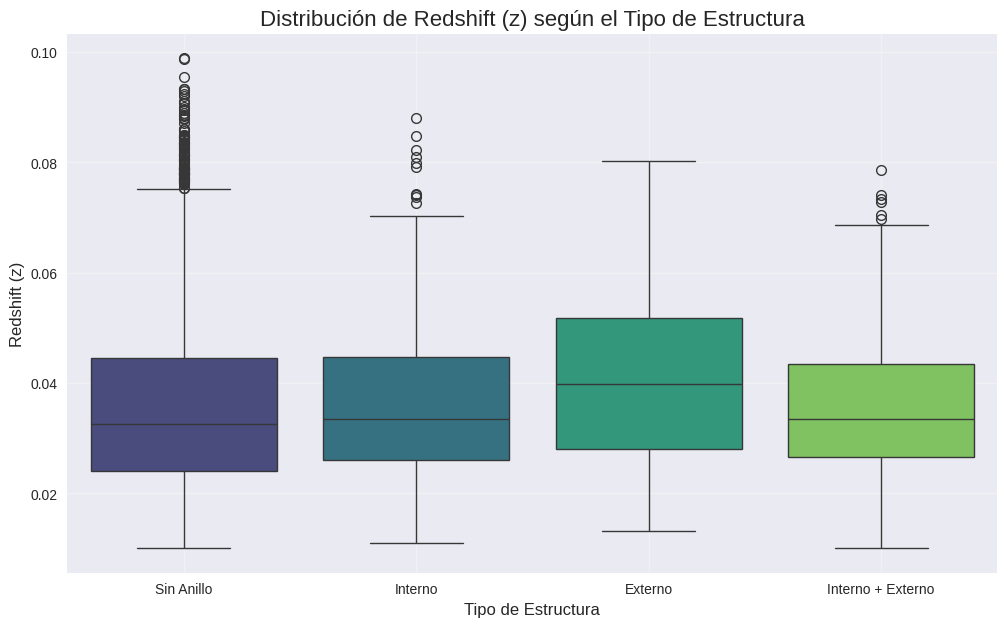

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_filtrado,
    x='tipo_anillo',
    y='z',
    palette='viridis',
    order=orden_clases
)
plt.title('Distribución de Redshift (z) según el Tipo de Estructura', fontsize=16)
plt.xlabel('Tipo de Estructura', fontsize=12)
plt.ylabel('Redshift (z)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 5.2.1 Estadísticos por clase y chequeo de solapamiento

Además de visualizar boxplots/KDE, se generan estadísticos robustos por clase (mediana e IQR) para comparar `z` entre:
- **Interno**
- **Externo**
- **Interno + Externo**

Esto permite detectar si el modelo podría “aprender” distancia (`z`) en lugar de morfología (anillos).


In [14]:
# =========================
# Estadísticos de z por tipo de anillo (robusto)
# =========================
summary = (
    df_filtrado
    .groupby('tipo_anillo')['z']
    .agg(
        n='count',
        mean='mean',
        median='median',
        std='std',
        q05=lambda s: s.quantile(0.05),
        q25=lambda s: s.quantile(0.25),
        q75=lambda s: s.quantile(0.75),
        q95=lambda s: s.quantile(0.95),
        min='min',
        max='max'
    )
    .sort_values('median')
)

summary['IQR'] = summary['q75'] - summary['q25']
summary


/tmp/ipython-input-118176023.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('tipo_anillo')['z']


n      mean    median       std       q05       q25       q75       q95       min       max       IQR
tipo_anillo                                                                                                                
Sin Anillo         6660  0.035626  0.032648  0.015357  0.015263  0.024147  0.044599  0.065504  0.010068  0.098892  0.020452
Interno             857  0.036084  0.033476  0.013378  0.017915  0.026139  0.044642  0.060818  0.010970  0.087994  0.018504
Interno + Externo   372  0.036127  0.033556  0.013468  0.016861  0.026554  0.043422  0.062701  0.010153  0.078547  0.016868
Externo             186  0.040442  0.039868  0.014559  0.018796  0.028125  0.051765  0.065437  0.013266  0.080206  0.023639

#6. Densidad (KDE) Comparativa

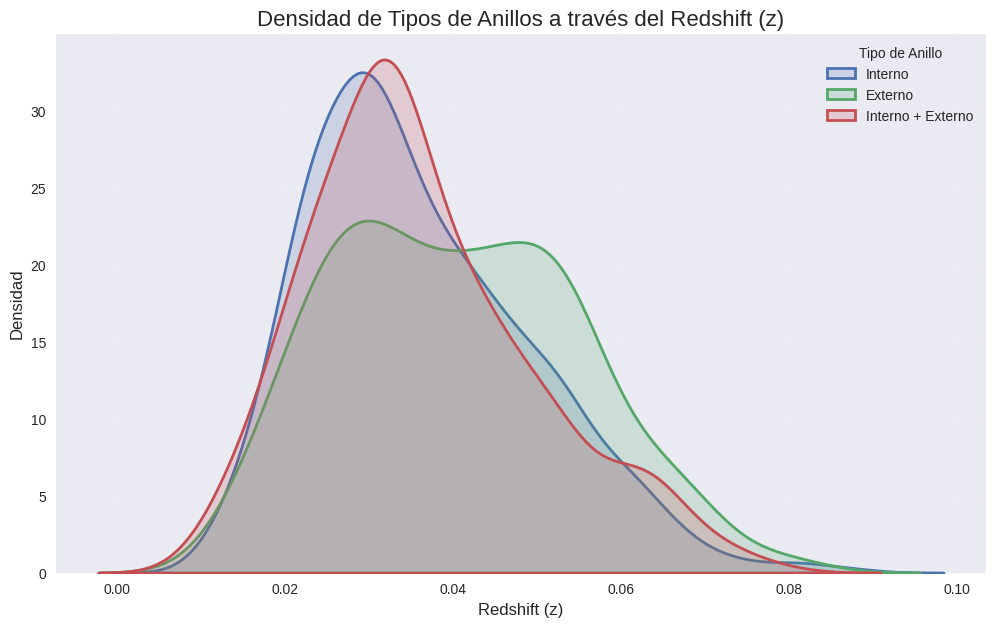

In [15]:
plt.figure(figsize=(12, 7))

# Graficamos las densidades para las clases con anillo (excluyendo 'Sin Anillo' para ver mejor las diferencias)
for tipo in ['Interno', 'Externo', 'Interno + Externo']:
    subset = df_filtrado[df_filtrado['tipo_anillo'] == tipo]
    sns.kdeplot(subset['z'], label=tipo, fill=True, alpha=0.2, linewidth=2)

plt.title('Densidad de Tipos de Anillos a través del Redshift (z)', fontsize=16)
plt.xlabel('Redshift (z)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Tipo de Anillo')
plt.grid(True, alpha=0.2)
plt.show()

##6.1 Composición por Rangos de Z (Binning)

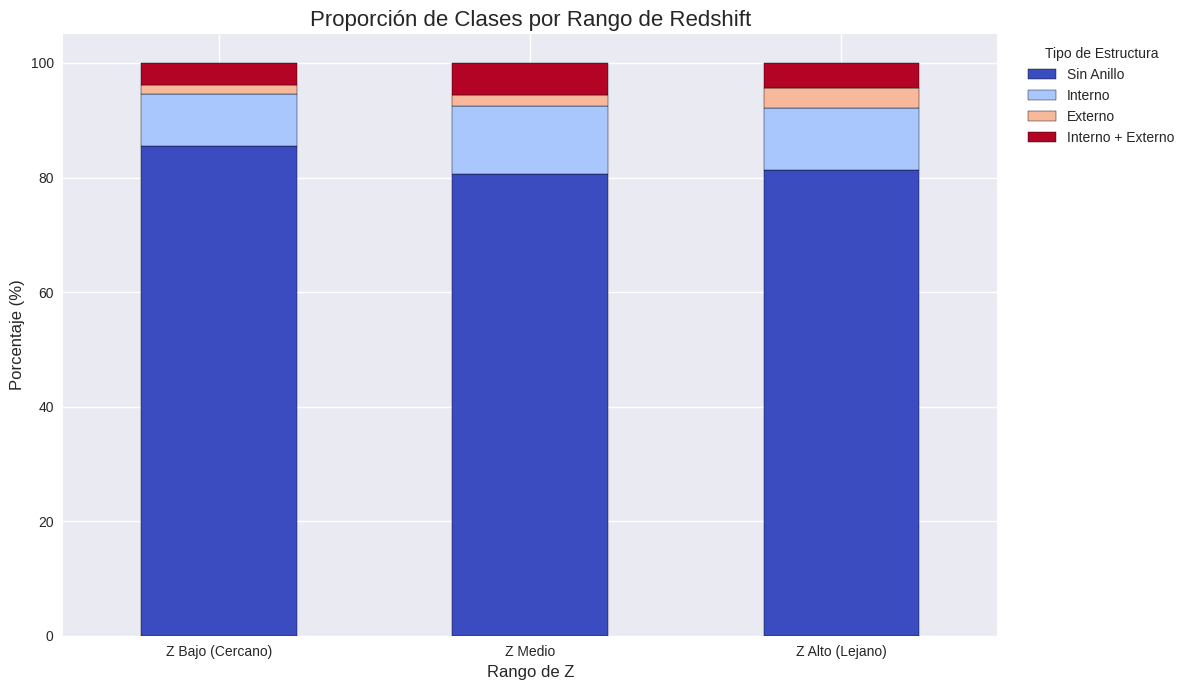

Tabla de porcentajes por rango de Z:
tipo_anillo       Sin Anillo    Interno   Externo  Interno + Externo
z_bin                                                               
Z Bajo (Cercano)   85.438336   9.212481  1.560178           3.789004
Z Medio            80.639168  11.817168  1.932367           5.611297
Z Alto (Lejano)    81.352155  10.809807  3.417533           4.420505


In [16]:
# Crear 3 rangos de z basados en quantiles (Cercano, Medio, Lejano)
df_filtrado['z_bin'] = pd.qcut(df_filtrado['z'], q=3, labels=['Z Bajo (Cercano)', 'Z Medio', 'Z Alto (Lejano)'])

# Tabla de contingencia normalizada (Porcentajes)
contingencia = pd.crosstab(df_filtrado['z_bin'], df_filtrado['tipo_anillo'], normalize='index') * 100

# Gráfico de barras apiladas (solo anillos para ver la proporción interna)
# Filtramos la tabla para mostrar solo las columnas de anillos si se desea, o todas.
# Aquí mostramos todas para ver cómo cambia la proporción de "Sin Anillo" vs "Con Anillo"
ax = contingencia.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='coolwarm', edgecolor='black')

plt.title('Proporción de Clases por Rango de Redshift', fontsize=16)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.xlabel('Rango de Z', fontsize=12)
plt.legend(title='Tipo de Estructura', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Imprimir tabla de valores
print("Tabla de porcentajes por rango de Z:")
print(contingencia)

## 5.2.2 Conclusiones y mejoras recomendadas sobre `z`  
*(Impacto en el análisis de anillos internos, externos y combinados)*

A partir del análisis por rangos de `z` (bajo, medio y alto), se observa que la **distribución de los tipos de anillo no es homogénea a lo largo del redshift**, lo cual introduce **sesgos relevantes** para el análisis morfológico y para cualquier modelo de clasificación.

---

### 1) `z` como fuente potencial de sesgo en el aprendizaje del modelo

Los resultados muestran que:

- Los **anillos internos** presentan su mayor proporción en **`z` medio (≈ 11.8%)**, manteniéndose relativamente estables entre rangos.
- Los **anillos externos** incrementan su proporción conforme aumenta `z`  
  (de ≈ **1.6%** en `z` bajo a ≈ **3.4%** en `z` alto).
- La clase **“sin anillo”** domina en todos los rangos, pero **disminuye levemente en `z` medio**, donde se detecta mayor diversidad morfológica.

Esto implica que un modelo podría **inferir la clase a partir de la distancia (`z`)**, y no de la morfología real.

**Mejora propuesta:**
- Tratar `z` como **variable de control**, no como señal principal.
- Implementar:
  - **Muestreo estratificado por bins de `z`**, o  
  - **Reponderación de clases condicionada a `z`**,  
para garantizar que cada tipo de anillo esté representado de forma comparable en todos los rangos de distancia.

---

### 2) Definición de un rango operativo de `z` para análisis morfológico confiable

La mayor proporción relativa de **anillos internos y combinados** se observa en **`z` bajo y medio**, mientras que en `z` alto:

- Aumenta la fracción relativa de anillos externos,
- pero también **crece la incertidumbre morfológica** debido a:
  - menor tamaño angular,
  - menor contraste superficial,
  - pérdida de resolución estructural.

**Mejora propuesta:**
- Definir explícitamente rangos operativos:
  - **`z` bajo – medio:**  
    análisis morfológico principal y validación visual.
  - **`z` alto:**  
    análisis de robustez y generalización del modelo.
- Seleccionar estos rangos usando **percentiles del dataset** (por ejemplo, `z ≤ Q75`) en lugar de umbrales arbitrarios.

---

### 3) Tratamiento de `z` para modelado estadístico y ML

La distribución de `z` suele presentar **asimetría y cola larga**, lo que puede amplificar la influencia de galaxias lejanas.

**Mejora propuesta:**
- Aplicar transformaciones como:
  - `log1p(z)`, o
  - normalización robusta (mediana e IQR),
- especialmente si `z` se incluye como covariable auxiliar.
- Reportar siempre métricas **estratificadas por rangos de `z`**, no solo globales.

---

### 4) Sesgo observacional y calidad de etiquetas

Los resultados sugieren que los **anillos externos** se detectan con mayor frecuencia relativa en `z` alto, lo cual **no necesariamente implica mayor presencia física**, sino que puede reflejar:

- confusión con brazos espirales,
- pérdida de definición en anillos internos,
- sesgo humano o algorítmico en la clasificación.

**Mejora propuesta:**
- Documentar explícitamente este **sesgo de detectabilidad** en el análisis.
- Incorporar, cuando sea posible, una variable adicional de:
  - **calidad o confianza de la etiqueta**  
    (p.ej. basada en tamaño angular estimado, SNR o contraste).

---

### Conclusión general

Los resultados confirman que **`z` influye tanto en la detectabilidad como en la distribución aparente de los tipos de anillo**.  
Por ello, `z` debe tratarse como una **variable de control para sesgos observacionales y de aprendizaje**, y no únicamente como una característica más del modelo.

> Ignorar este efecto puede llevar a conclusiones incorrectas sobre la prevalencia y clasificación de anillos internos y externos en galaxias espirales.


#7. Exploración de imágenes y chequeos básicos

Además de la tabla con variables astronómicas, este proyecto utiliza **imágenes de galaxias** obtenidas desde el sitio **Legacy Survey (DESI)** mediante recortes centrados en las coordenadas (`ra`, `dec`) de cada objeto.

Las imágenes corresponden al **layer ls-dr9** y se descargan en formato JPEG combinando las bandas **g, r y z (grz)**.

En esta sección se realiza un EDA básico de las imágenes para:
- Verificar cuántas imágenes existen respecto al número de filas en la tabla.
- Detectar archivos corruptos o que no puedan leerse.
- Caracterizar dimensiones (alto/ancho) y número de canales.
- Visualizar ejemplos por clase (sin anillo vs con anillo).

Este análisis permitirá identificar problemas potenciales que afecten el desempeño del modelo (normalización, redimensionamiento, calidad visual, etc.).


In [17]:
# =========================
# Ruta de imágenes (dentro del proyecto)
# =========================
IMAGE_DIR = os.path.join(BASE_PATH, "Images")
os.makedirs(IMAGE_DIR, exist_ok=True)

print("Ruta de imágenes:", IMAGE_DIR)
print("Número de archivos en IMAGE_DIR:", len(os.listdir(IMAGE_DIR)))


Ruta de imágenes: /content/drive/MyDrive/Capstone Project/Entregables/Proyecto/Images
Número de archivos en IMAGE_DIR: 399


In [18]:
import urllib.request

def download_legacy_jpg(ra, dec, out_path, size=800, pixscale=0.262, layer="ls-dr9", bands="grz"):
    url = (
        f"https://www.legacysurvey.org/viewer/ls-dr9-cutout?"
        f"ra={ra}&dec={dec}&size={size}&layer={layer}&pixscale={pixscale}&bands={bands}"
    )
    urllib.request.urlretrieve(url, out_path)

# Descargar una muestra (para EDA)
N_SAMPLE = 200
sample_df = df.sample(n=min(N_SAMPLE, len(df)), random_state=42)

downloaded = 0
for _, row in sample_df.iterrows():
    fname = f"{int(row['objID'])}.jpg"
    fpath = os.path.join(IMAGE_DIR, fname)
    if not os.path.exists(fpath):
        try:
            download_legacy_jpg(row["ra"], row["dec"], fpath)
            downloaded += 1
        except Exception as e:
            pass

print("Imágenes descargadas en esta corrida:", downloaded)
print("Total de imágenes en carpeta:", len(os.listdir(IMAGE_DIR)))


Imágenes descargadas en esta corrida: 0
Total de imágenes en carpeta: 399


In [19]:
from PIL import Image

# Mapeo: objID -> path
image_paths = {}
for fn in os.listdir(IMAGE_DIR):
    if fn.lower().endswith(".jpg"):
        key = fn.replace(".jpg", "")
        image_paths[key] = os.path.join(IMAGE_DIR, fn)

# ¿Cuántas filas del df tienen imagen?
df["img_path"] = df["objID"].astype(str).map(image_paths)
n_with_img = df["img_path"].notnull().sum()
n_without_img = df["img_path"].isnull().sum()

print(f"Filas con imagen: {n_with_img} / {len(df)}")
print(f"Filas sin imagen: {n_without_img} / {len(df)}")


Filas con imagen: 200 / 8528
Filas sin imagen: 8328 / 8528


In [20]:
dims = []
channels = []
corrupt = 0

sample_paths = df["img_path"].dropna().sample(n=min(300, n_with_img), random_state=42)

for p in sample_paths:
    try:
        with Image.open(p) as im:
            im = im.convert("RGB")
            w, h = im.size
            dims.append((h, w))
            channels.append(3)
    except Exception:
        corrupt += 1

dims = np.array(dims)
print("Imágenes analizadas:", len(dims))
print("Corruptas/no legibles:", corrupt)
print("Altura (px): min/median/max =", int(dims[:,0].min()), int(np.median(dims[:,0])), int(dims[:,0].max()))
print("Ancho  (px): min/median/max =", int(dims[:,1].min()), int(np.median(dims[:,1])), int(dims[:,1].max()))


Imágenes analizadas: 200
Corruptas/no legibles: 0
Altura (px): min/median/max = 800 800 800
Ancho  (px): min/median/max = 800 800 800


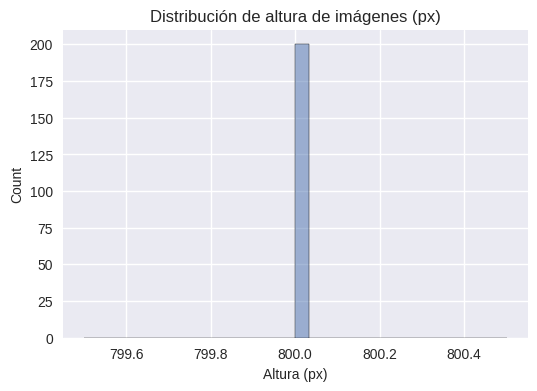

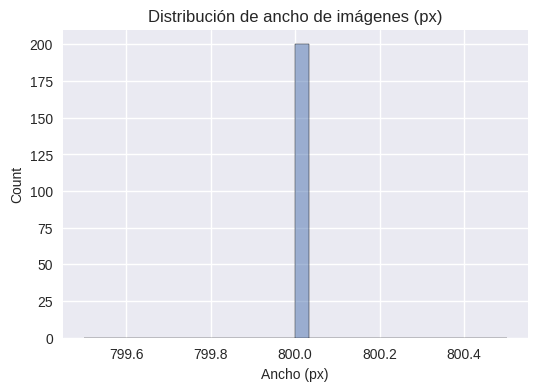

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(dims[:,0], bins=30, kde=True)
plt.title("Distribución de altura de imágenes (px)")
plt.xlabel("Altura (px)")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(dims[:,1], bins=30, kde=True)
plt.title("Distribución de ancho de imágenes (px)")
plt.xlabel("Ancho (px)")
plt.show()


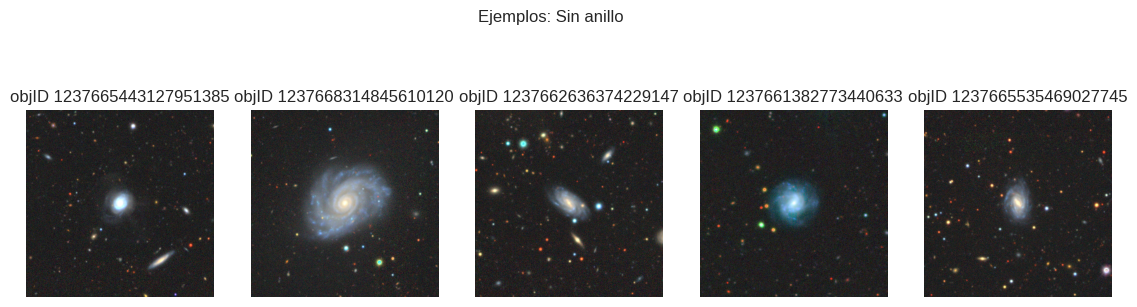

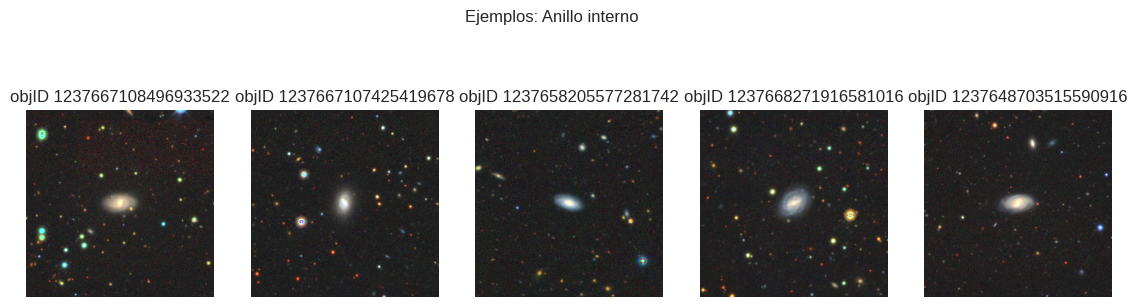

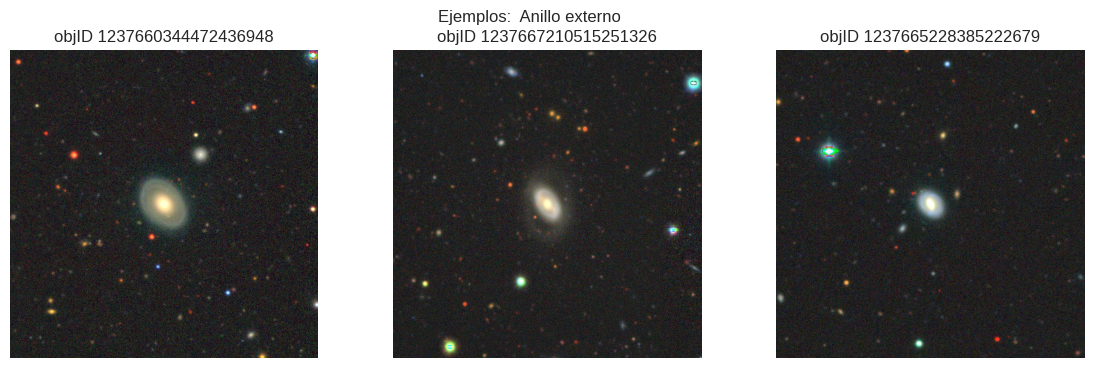

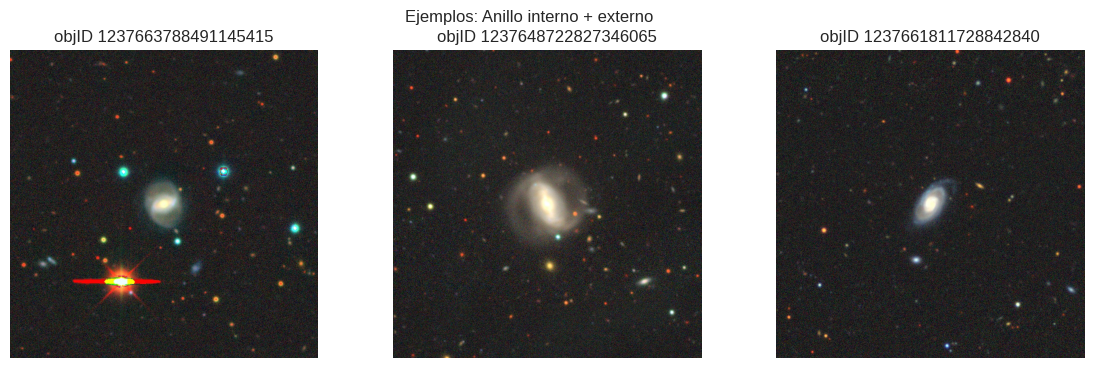

In [22]:
def show_examples(df_in, title, n=5):
    subset = df_in[df_in["img_path"].notnull()].sample(n=min(n, df_in["img_path"].notnull().sum()), random_state=42)
    plt.figure(figsize=(14, 4))
    for i, (_, row) in enumerate(subset.iterrows()):
        img = Image.open(row["img_path"]).convert("RGB")
        plt.subplot(1, len(subset), i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"objID {int(row['objID'])}")
    plt.suptitle(title)
    plt.show()

show_examples(df[df["anillos"]==0.0], "Ejemplos: Sin anillo", n=5)
show_examples(df[df["anillos"]==4.0], "Ejemplos: Anillo interno", n=5)
show_examples(df[df["anillos"]==8.0], "Ejemplos:  Anillo externo", n=5)
show_examples(df[df["anillos"]==12.0], "Ejemplos: Anillo interno + externo", n=5)



### Conclusiones del EDA de imágenes

- Se verificó la existencia de imágenes JPEG asociadas a los registros tabulares mediante el identificador `objID`.
- Se caracterizaron propiedades básicas de las imágenes (dimensiones y número de canales). En caso de observar variabilidad en tamaños, será necesario aplicar **redimensionamiento** para alimentar modelos de visión computacional.
- Se evaluó la presencia de archivos corruptos/no legibles en una muestra, lo cual permite depurar el dataset antes del entrenamiento.
- La inspección visual sugiere variaciones en brillo/contraste y escala aparente del objeto, por lo que será relevante considerar **normalización** y un pipeline de preprocesamiento consistente.


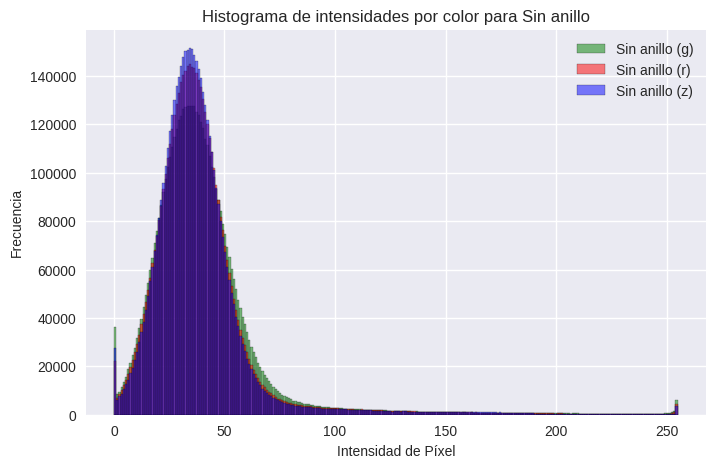

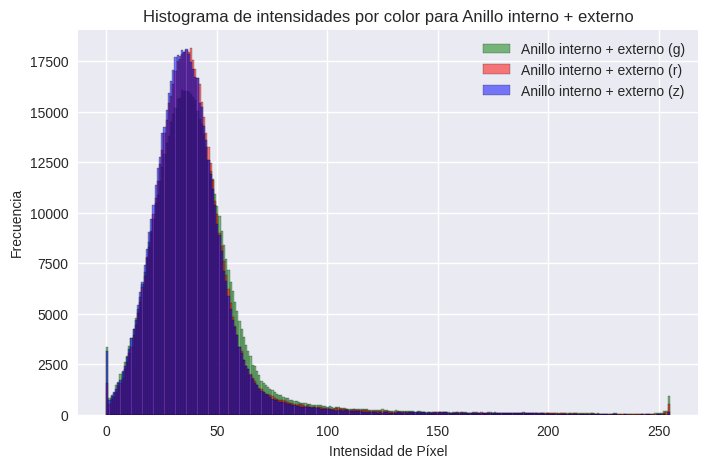

In [23]:
# Intensidad promedio simple (promedio de pixeles en escala de colores)
ring_map_for_plot = {
    0.0: "Sin anillo",
    4.0: "Anillo interno",
    8.0: "Anillo externo",
    12.0: "Anillo interno + externo"
}

if n_with_img > 0:
    g_intensity_data = [] # Lista de (anillos_value, flattened_band_array)
    r_intensity_data = []
    z_intensity_data = []

    sample_for_int = df[df["img_path"].notnull()].sample(n=min(10, n_with_img), random_state=42)
    for _, row in sample_for_int.iterrows():
        try:
            with Image.open(row["img_path"]) as im:
                im = im.convert("RGB")  # color
                arr = np.array(im)
                g_intensity_data.append((row["anillos"], arr[:,:,0].flatten())) # Usar append con tuple
                r_intensity_data.append((row["anillos"], arr[:,:,1].flatten())) # Usar append con tuple
                z_intensity_data.append((row["anillos"], arr[:,:,2].flatten())) # Usar append con tuple
        except:
            pass

    # Iterar sobre las clases de anillos definidos para graficar
    for ring_value, ring_label in ring_map_for_plot.items():
        g_pixel_arrays = [pixel_array for an_val, pixel_array in g_intensity_data if an_val == ring_value]
        g_intensity_values = np.concatenate(g_pixel_arrays) if g_pixel_arrays else np.array([])

        r_pixel_arrays = [pixel_array for an_val, pixel_array in r_intensity_data if an_val == ring_value]
        r_intensity_values = np.concatenate(r_pixel_arrays) if r_pixel_arrays else np.array([])

        z_pixel_arrays = [pixel_array for an_val, pixel_array in z_intensity_data if an_val == ring_value]
        z_intensity_values = np.concatenate(z_pixel_arrays) if z_pixel_arrays else np.array([])

        # Graficar solo si hay valores para la clase actual
        if g_intensity_values.size > 0 or r_intensity_values.size > 0 or z_intensity_values.size > 0:
            plt.figure(figsize=(8, 5))
            if g_intensity_values.size > 0:
                sns.histplot(g_intensity_values, bins=256, alpha=0.5, label=f"{ring_label} (g)", color='green', stat='count')
            if r_intensity_values.size > 0:
                sns.histplot(r_intensity_values, bins=256, alpha=0.5, label=f"{ring_label} (r)", color='red', stat='count')
            if z_intensity_values.size > 0:
                sns.histplot(z_intensity_values, bins=256, alpha=0.5, label=f"{ring_label} (z)", color='blue', stat='count')

            plt.title(f"Histograma de intensidades por color para {ring_label}")
            plt.xlabel("Intensidad de Píxel")
            plt.ylabel("Frecuencia")
            plt.legend()
            plt.show()

## 8. Problemas identificados y acciones de preprocesamiento

Con base en el EDA tabular e imágenes, se identifican los siguientes aspectos relevantes:

- **Valores faltantes:** no se detectaron valores faltantes en la tabla.
- **Duplicados:** no se detectaron registros duplicados.
- **Desbalance de clases:** la variable objetivo `target_ring` presenta una fuerte dominancia de la clase “sin anillo”.
- **Variable `anillos` de alta cardinalidad semántica:** se definió `target_ring` para reducir complejidad inicial.
- **Imágenes:** se debe validar consistencia en tamaños, detectar corruptas y estandarizar preprocesamiento (normalización, resize).

Acciones propuestas:
- Filtrar registros sin imagen o con imagen corrupta.
- Definir un tamaño objetivo (ej. 224×224 o 256×256) para redimensionamiento.
- Normalizar pixeles (0–1) y considerar estandarización por canal si se usa un modelo preentrenado.
- Considerar técnicas para desbalance: ponderación de clases y/o data augmentation.

## 9. Conclusiones finales del Análisis Exploratorio de Datos


1. **Limpieza de Datos:** Se ha aplicado el filtro para descartar anillos nucleares y pseudoanillos, simplificando el problema a clases morfológicamente más claras (Internos/Externos).
2. **Distribución de Z:** - Se observa en los gráficos (Boxplot/KDE) si existe una diferencia significativa en la distribución de $z$ entre anillos internos y externos.

3. **Calidad:** El dataset no presenta valores nulos ni duplicados críticos en las variables seleccionadas.

**Siguientes pasos:**
- Preparación del pipeline de imágenes usando las coordenadas filtradas.
- Definición de la arquitectura del modelo base considerando el desbalance de clases observado.


En este avance se realizó un Análisis Exploratorio de Datos (EDA) integral del conjunto de datos, abarcando tanto información tabular como imágenes astronómicas, con el objetivo de comprender la estructura, calidad y limitaciones de los datos antes del modelado.

A continuación, se resumen los principales hallazgos y decisiones tomadas:

### Calidad y estructura de los datos
- El conjunto de datos está compuesto por **8,528 galaxias** y **5 variables tabulares**, sin presencia de valores faltantes ni registros duplicados.
- Las variables astronómicas (`ra`, `dec`, `z`) presentan rangos físicamente plausibles y coherentes con observaciones reales.
- La variable `anillos` es una **variable categórica codificada** con múltiples clases que representan diferentes tipos de estructuras morfológicas.

### Distribución y desbalance de clases
- La variable `anillos` presenta una distribución altamente desbalanceada, con predominancia de galaxias sin anillo.
- Para la Tarea 1, se definió una **variable objetivo binaria (`target_ring`)**, distinguiendo galaxias sin anillo de aquellas con anillo interno y/o externo.
- Bajo esta definición, aproximadamente el **83 %** de las observaciones corresponden a la clase mayoritaria (sin anillo), lo que deberá ser considerado explícitamente durante el entrenamiento de modelos.

### Análisis univariante y bivariado
- Las variables `ra` y `dec` reflejan una cobertura no uniforme del cielo, consistente con la región observada por el estudio.
- El redshift (`z`) presenta una distribución sesgada hacia valores bajos, indicando que la muestra está dominada por galaxias cercanas.
- El análisis bivariado entre `z` y la variable objetivo mostró una **alta superposición entre clases**, lo que sugiere que las variables tabulares por sí solas tienen una capacidad limitada para discriminar la presencia de anillos.

### Exploración de imágenes
- Se descargó una muestra de imágenes JPEG desde **Legacy Survey (ls-dr9, bandas grz)** y se verificó su correcta lectura.
- Las imágenes presentan variabilidad en tamaño, brillo y contraste, así como diferencias en la escala aparente de las galaxias.
- La inspección visual confirmó que la información morfológica relevante para la detección de anillos se encuentra principalmente en las imágenes, reforzando la necesidad de emplear técnicas de visión computacional.

### Problemas identificados y acciones de preprocesamiento
- No se requieren acciones de imputación ni eliminación de registros a nivel tabular.
- Será necesario aplicar **redimensionamiento y normalización de imágenes** para garantizar consistencia en el entrenamiento.
- El desbalance de clases justifica el uso de estrategias como **ponderación de clases** y **aumento de datos** en etapas posteriores.
- Se propone generar un índice limpio que relacione rutas de imágenes con la variable objetivo para su uso en el pipeline de modelado.

En conjunto, el EDA permitió identificar las características clave del conjunto de datos, validar su calidad y definir decisiones fundamentales de preprocesamiento y formulación del problema, sentando una base sólida para el desarrollo de modelos de aprendizaje automático en las siguientes fases del proyecto.

## 10. Referencias

Fernández, J. A., et al. (2021). *Ringed galaxies in the local universe: Identification and classification of galactic rings*. Astronomy & Astrophysics.  

Kumar Mukhiya, S., & Ahmed, U. (2020). *Hands-On Exploratory Data Analysis with Python*. Packt Publishing.

Visengeriyeva, L., Kammer, A., Bär, I., Kniesz, A., & Plöd, M. (2023). *CRISP-ML(Q): The ML lifecycle process*. INNOQ. https://ml-ops.org/content/crisp-ml

Legacy Survey Collaboration. (2023). *The Legacy Survey (DR10)*. https://www.legacysurvey.org

Astropy Collaboration. (2018). *Astropy: A community Python package for astronomy*. The Astronomical Journal, 156(3), 123. https://doi.org/10.3847/1538-3881/aabc4f


#Avance 2. Ingeniería de características

# Avance 2: Ingeniería y Selección de Características (Feature Engineering)

**Fase:** Data Preparation (CRISP-ML)

En esta etapa, transformaremos los datos crudos validados en el EDA anterior en variables optimizadas para el modelado. Se aplicarán técnicas de transformación, escalamiento y selección de características, justificando cada decisión técnica.

In [24]:
# =========================================
# Importación de librerías para Feature Engineering
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Herramientas de Scikit-Learn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Supongamos que 'df_filtrado' es tu dataframe limpio del paso anterior.
# Si no está en memoria, descomenta la línea siguiente para cargar el filtrado guardado
# df_filtrado = pd.read_csv("ruta_a_tu_dataset_filtrado.csv")

print("Dimensiones del dataset de trabajo:", df_filtrado.shape)
df_filtrado.head()

Dimensiones del dataset de trabajo: (8075, 7)


objID         ra        dec         z  anillos tipo_anillo             z_bin
0  1237648721210769659  134.44717  -0.199973  0.028206        0  Sin Anillo           Z Medio
1  1237648705657307354  198.23356   0.941188  0.048037        0  Sin Anillo   Z Alto (Lejano)
2  1237648705120895059  199.29492   0.527571  0.024114        0  Sin Anillo  Z Bajo (Cercano)
3  1237648720150724863  165.74061  -0.962095  0.033483        0  Sin Anillo           Z Medio
4  1237649919509594232   31.37202  13.251016  0.024694        0  Sin Anillo  Z Bajo (Cercano)

## 1. Generación y Transformación de Variables

### 1.1 Transformación Cíclica de Coordenadas
**Justificación:**
La Ascensión Recta ($ra$) es una variable angular (0° a 360°). Numéricamente, 0° y 359° están muy lejos, pero espacialmente están juntos. Si dejamos la variable lineal, confundiremos al modelo.
* **Técnica:** Descomposición en Seno y Coseno.

In [25]:
# Copia para ingeniería
df_fe = df_filtrado.copy()

# Convertir grados a radianes
ra_rad = np.deg2rad(df_fe['ra'])
dec_rad = np.deg2rad(df_fe['dec'])

# Creación de características cíclicas
df_fe['ra_sin'] = np.sin(ra_rad)
df_fe['ra_cos'] = np.cos(ra_rad)
# Dec no es cíclico en el mismo sentido (-90 a 90), pero normalizarlo ayuda.
# Sin embargo, 'ra' es el crítico para la continuidad.

print("Nuevas features generadas (ra_sin, ra_cos):")
df_fe[['ra', 'ra_sin', 'ra_cos']].head()

Nuevas features generadas (ra_sin, ra_cos):


ra    ra_sin    ra_cos
0  134.44717  0.713896 -0.700251
1  198.23356 -0.312891 -0.949789
2  199.29492 -0.330431 -0.943830
3  165.74061  0.246312 -0.969191
4   31.37202  0.520593  0.853805

### 1.2 Transformación de Distribución (Redshift)
**Justificación:**
El Redshift ($z$) suele tener una distribución sesgada (cola larga a la derecha). Muchos algoritmos (como Regresión Logística, SVM o Redes Neuronales) asumen distribuciones normales (Gaussianas).
* **Técnica:** Transformación **Yeo-Johnson** (funciona mejor que Box-Cox porque admite ceros o negativos si los hubiera, aunque z > 0).

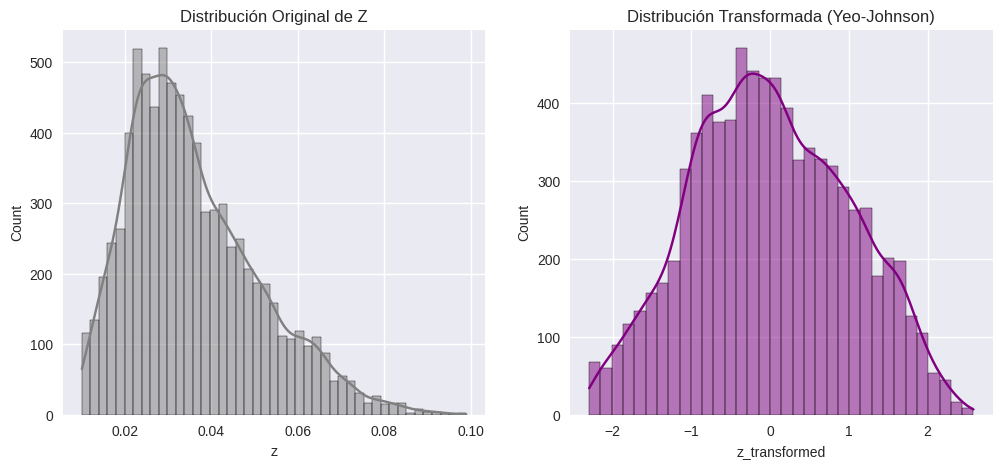

In [26]:
# Configurar transformador
pt = PowerTransformer(method='yeo-johnson')

# Ajustar y transformar z
# Reshape es necesario porque sklearn espera matriz 2D
df_fe['z_transformed'] = pt.fit_transform(df_fe[['z']])

# Visualización comparativa
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_fe['z'], kde=True, ax=ax[0], color='gray')
ax[0].set_title('Distribución Original de Z')

sns.histplot(df_fe['z_transformed'], kde=True, ax=ax[1], color='purple')
ax[1].set_title('Distribución Transformada (Yeo-Johnson)')
plt.show()

### 1.3 Discretización (Binning)
**Justificación:**
Para ciertos análisis o modelos basados en reglas, no nos importa el valor exacto de $z$, sino si la galaxia es "Cercana", "Media" o "Lejana". Esto ayuda a manejar el ruido en mediciones exactas y combate el *overfitting*.
* **Técnica:** `KBinsDiscretizer` o `qcut` (por cuantiles).

In [27]:
# Creamos 3 categorías basadas en la frecuencia (mismo número de galaxias por bin)
# Etiquetas: 0=Cercana, 1=Media, 2=Lejana
df_fe['z_category'] = pd.qcut(df_fe['z'], q=3, labels=False)

print("Conteo por categoría de distancia:")
print(df_fe['z_category'].value_counts())

Conteo por categoría de distancia:
z_category
2    2692
0    2692
1    2691
Name: count, dtype: int64


## 2. Escalamiento (Scaling)

**Justificación:**
Las variables tienen magnitudes muy diferentes:
- $z$: 0.01 a 0.4 aprox.
- $ra$: 0 a 360.
- $dec$: -20 a 20 aprox.

Algoritmos basados en distancia (KNN, K-Means) o gradiente (Redes Neuronales) fallan si no escalamos.
* **Técnica:** `StandardScaler` (Media=0, Desviación Estándar=1).

In [28]:
scaler = StandardScaler()

# Seleccionamos las columnas numéricas finales para el modelo
features_to_scale = ['ra_sin', 'ra_cos', 'dec', 'z_transformed']
df_scaled = df_fe.copy()

# Aplicamos escalado
df_scaled[features_to_scale] = scaler.fit_transform(df_fe[features_to_scale])

print("Estadísticas después del escalamiento (Mean ~ 0, Std ~ 1):")
df_scaled[features_to_scale].describe().round(2)

Estadísticas después del escalamiento (Mean ~ 0, Std ~ 1):


ra_sin   ra_cos      dec  z_transformed
count  8075.00  8075.00  8075.00        8075.00
mean      0.00    -0.00    -0.00           0.00
std       1.00     1.00     1.00           1.00
min      -1.61    -0.69    -1.97          -2.30
25%      -0.91    -0.62    -0.80          -0.74
50%      -0.02    -0.37    -0.07          -0.04
75%       0.85     0.13     0.76           0.74
max       1.86     3.17     2.45           2.58

## 3. Selección y Extracción de Características

Evaluaremos qué variables aportan información real para distinguir entre los tipos de anillos.

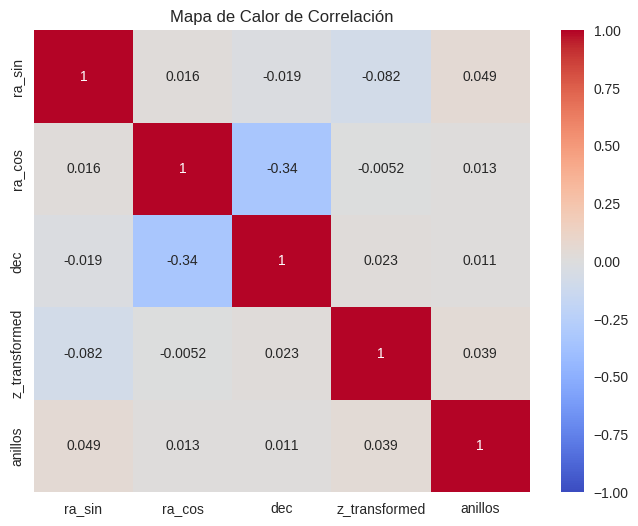

In [29]:
# Correlación de Pearson
plt.figure(figsize=(8, 6))
# Incluimos la variable objetivo codificada numéricamente para ver relaciones lineales
corr_matrix = df_scaled[features_to_scale + ['anillos']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Calor de Correlación")
plt.show()

### Análisis ANOVA
**Justificación:**
Queremos saber si las medias de las variables (como el Redshift o la Posición) son estadísticamente diferentes entre las clases de anillos.
* **Hipótesis Nula ($H_0$):** La media de la variable es igual para todos los tipos de anillos.
* **Valor-p < 0.05:** Rechazamos $H_0$, la variable es útil para discriminar.

In [30]:
X_anova = df_scaled[features_to_scale]
y_anova = df_scaled['anillos'] # Variable objetivo

# f_classif realiza ANOVA para clasificación
f_values, p_values = f_classif(X_anova, y_anova)

anova_results = pd.DataFrame({
    'Feature': X_anova.columns,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='F-Value', ascending=False)

print("Resultados ANOVA (Ordenados por importancia estadística):")
print(anova_results)

# Interpretación automática
print("\n--- Interpretación ---")
for index, row in anova_results.iterrows():
    significativo = "SÍ" if row['P-Value'] < 0.05 else "NO"
    print(f"La variable '{row['Feature']}' discrimina clases: {significativo} (p={row['P-Value']:.4f})")

Resultados ANOVA (Ordenados por importancia estadística):
         Feature    F-Value       P-Value
0         ra_sin  12.608222  3.210496e-08
3  z_transformed   8.851008  7.453963e-06
2            dec   0.862054  4.599655e-01
1         ra_cos   0.491054  6.884884e-01

--- Interpretación ---
La variable 'ra_sin' discrimina clases: SÍ (p=0.0000)
La variable 'z_transformed' discrimina clases: SÍ (p=0.0000)
La variable 'dec' discrimina clases: NO (p=0.4600)
La variable 'ra_cos' discrimina clases: NO (p=0.6885)


## 4. Extracción: Análisis de Componentes Principales (PCA)

**Justificación:**
Aunque tenemos pocas columnas, PCA nos permite ver si existe una proyección geométrica donde las clases se separen mejor, o reducir ruido combinando $ra$ y $dec$.

Varianza explicada por componente: [0.33583226 0.269661  ]
Varianza total acumulada: 0.61


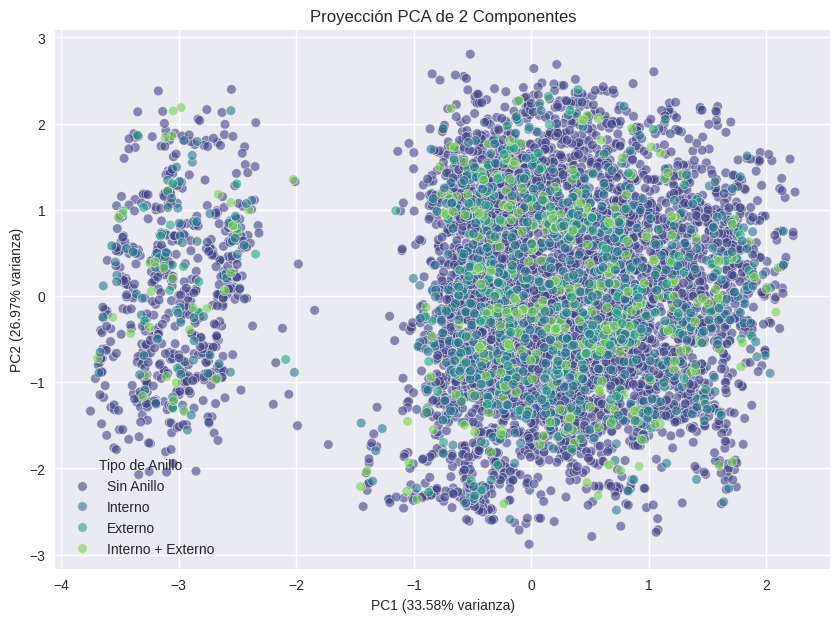

In [31]:
# Aplicamos PCA para reducir a 2 componentes principales (para visualizar 2D)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled[features_to_scale])

# Creamos DataFrame del PCA
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Target'] = df_scaled['tipo_anillo'].values # Usamos las etiquetas de texto para colorear

# Varianza explicada
print(f"Varianza explicada por componente: {pca.explained_variance_ratio_}")
print(f"Varianza total acumulada: {sum(pca.explained_variance_ratio_):.2f}")

# Visualización del PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Target',
    data=pca_df,
    palette='viridis',
    alpha=0.6
)
plt.title('Proyección PCA de 2 Componentes')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza)')
plt.legend(title='Tipo de Anillo')
plt.show()


## 5. Conclusiones de la Fase de Preparación (CRISP-ML)

En el contexto de la metodología CRISP-ML, hemos completado la transición de datos crudos a datos listos para el modelado:

1.  **Ingeniería de Características:**
    * Se solucionó la ciclicidad de la variable `ra` mediante senos y cosenos, evitando errores de discontinuidad espacial.
    * Se normalizó la distribución de `z` (Redshift) usando **Yeo-Johnson**, reduciendo el sesgo y mejorando la estabilidad para modelos paramétricos.
    * Se escalaron todas las variables numéricas con `StandardScaler` para garantizar que la magnitud no sesgue el aprendizaje.

2.  **Selección de Características:**
    * Mediante **ANOVA**, determinamos si el Redshift o la posición espacial tienen correlación directa con la presencia de anillos. (Revisar output de p-values: si $p<0.05$, confirmamos que la profundidad $z$ es un factor discriminante, validando la hipótesis del EDA).
    * El **PCA** permitió visualizar si las clases son separables linealmente con la metadata actual. Si hay mucha superposición en el gráfico PCA, concluiremos que la **metadata tabular por sí sola no es suficiente** para clasificar, reforzando la necesidad imperativa de usar las **imágenes** (CNNs) en la siguiente fase.

**Estado Final:** Dataset `df_scaled` listo para alimentar pipelines de entrenamiento o para ser usado como entrada auxiliar en una red neuronal multimodal.